### 목표 : 많은 특성의 데이터셋에서 과대적합 해결하기
- data    : perch3.csv
- feature : Length, Height, Width
- target  : Weight
- [ condition ] 
    - 특성 추가 : degree = 5
    - 특성 기반으로 무게 예측 → 지도학습 + 회귀
  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
fish = pd.read_csv('../data/perch3.csv')

In [3]:
fish.head()

,Weight,Length,Height,Width
0,5.9,8.4,2.1120,1.4080
1,32.0,13.7,3.5280,1.9992
2,40.0,15.0,3.8240,2.4320
3,51.5,16.2,4.5924,2.6316
4,70.0,17.4,4.5880,2.9415


In [ ]:
#data check

In [17]:
target = fish[fish.columns[0]]
feature = fish.drop(['Weight'],axis=1)

In [18]:
print(f'feature = {feature.shape}, target = {target.shape}')

feature = (56, 3), target = (56,)


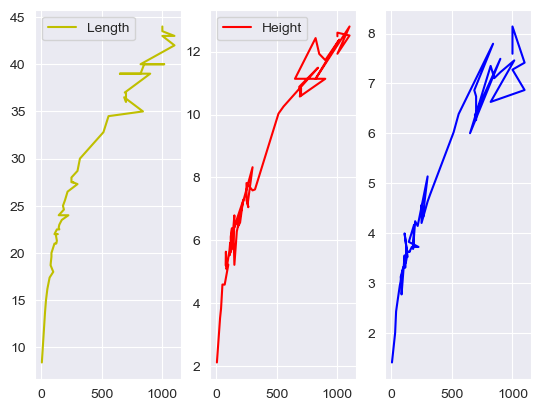

In [26]:
# 데이터 분포 확인
plt.subplot(1,3,1)
plt.plot(target, feature['Length'], color='y', label='Length')
plt.legend()

plt.subplot(1,3,2)
plt.plot(target, feature["Height"], color='r', label='Height')
plt.legend()

plt.subplot(1,3,3)
plt.plot(target, feature["Width"], color= 'b', label = 'Width')

#직선의 형태는 아니나 곡선의 양비례(양방향) 분포 확인

3. data treatment
<hr>

- 특성 추가
- 특성 스케일링

In [39]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5, include_bias = False)
poly.fit(feature)

poly_feature = poly.transform(feature)
poly_feature.shape

(56, 55)

In [40]:
print(f'특성 추가: {poly_feature.shape}\n {poly.feature_names_in_}=>{poly.get_feature_names_out()}')

특성 추가: (56, 55)
 ['Length' 'Height' 'Width']=>['Length' 'Height' 'Width' 'Length^2' 'Length Height' 'Length Width'
 'Height^2' 'Height Width' 'Width^2' 'Length^3' 'Length^2 Height'
 'Length^2 Width' 'Length Height^2' 'Length Height Width' 'Length Width^2'
 'Height^3' 'Height^2 Width' 'Height Width^2' 'Width^3' 'Length^4'
 'Length^3 Height' 'Length^3 Width' 'Length^2 Height^2'
 'Length^2 Height Width' 'Length^2 Width^2' 'Length Height^3'
 'Length Height^2 Width' 'Length Height Width^2' 'Length Width^3'
 'Height^4' 'Height^3 Width' 'Height^2 Width^2' 'Height Width^3' 'Width^4'
 'Length^5' 'Length^4 Height' 'Length^4 Width' 'Length^3 Height^2'
 'Length^3 Height Width' 'Length^3 Width^2' 'Length^2 Height^3'
 'Length^2 Height^2 Width' 'Length^2 Height Width^2' 'Length^2 Width^3'
 'Length Height^4' 'Length Height^3 Width' 'Length Height^2 Width^2'
 'Length Height Width^3' 'Length Width^4' 'Height^5' 'Height^4 Width'
 'Height^3 Width^2' 'Height^2 Width^3' 'Height Width^4' 'Width^5']


In [41]:
# scale

#train, test separating
xtrain, xtest, ytrain, ytest = train_test_split(poly_feature, target, random_state=5)

In [42]:
print(f'[TRAIN]\n {xtrain.shape},{ytrain.shape}\n\n[TEST]\n{xtest.shape}, {ytest.shape}')

[TRAIN]
 (42, 55),(42,)

[TEST]
(14, 55), (14,)


In [43]:
#scale feature

from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(xtrain)

StandardScaler()

In [44]:
scaled_xtrain = std.transform(xtrain)
scaled_xtest = std.transform(xtest)

4. 학습 진행: 회귀학습

In [45]:
from sklearn.linear_model import LinearRegression

lrmd = LinearRegression()
lrmd.fit(scaled_xtrain, ytrain)

LinearRegression()

In [49]:
trainscore = lrmd.score(scaled_xtrain, ytrain)
testscore = lrmd.score(scaled_xtest,ytest)

print(f'[trainscore]\n {trainscore}\n [testscore]\n {testscore}')

#OverFitted

[trainscore]
 1.0
 [testscore]
 -38.767868061603046


### 규제 : 가중치 W 값을 조절하여 과대적합 문제 해결
- Ridge : 모든 feature의 가중치를 0에 가깝게 조절
- Lasso : 특정 feature의 가중치를 0으로 만들어 차원 축소

[ 규제 1 ] Ridge 

In [50]:
from sklearn.linear_model import Ridge

In [55]:
r_md = Ridge(max_iter=100)
r_md.fit(scaled_xtrain, ytrain)

Ridge(max_iter=100)

In [56]:
trainscore = r_md.score(scaled_xtrain, ytrain)
testscore = r_md.score(scaled_xtest, ytest)

print(f'[trainscore]\n {trainscore}\n [testscore]\n {testscore}')

[trainscore]
 0.9874355208005008
 [testscore]
 0.9914491207423642


In [57]:
#model parameter check

print(r_md.n_iter_,'\n', r_md.coef_,'\n', r_md.intercept_)

None 
 [ 1.83176874e+00 -7.23677789e+00  1.03067055e+01  1.57775249e+01
  1.18446480e+01  1.67466597e+01  9.57952490e+00  1.47797173e+01
  2.48615142e+01  1.85163425e+01  1.67577526e+01  1.46142404e+01
  1.58382863e+01  1.38108100e+01  1.64490445e+01  1.56379186e+01
  1.39352928e+01  1.71480760e+01  2.50779150e+01  1.42694832e+01
  1.39921892e+01  6.23690826e+00  1.41806030e+01  6.32646330e+00
  2.93976268e+00  1.47629117e+01  7.00986521e+00  3.97399179e+00
  5.70584401e+00  1.56796396e+01  8.23737024e+00  5.75159002e+00
  8.24469917e+00  1.54675618e+01  5.86439125e+00  6.81074624e+00
 -5.88111799e+00  8.02129126e+00 -4.97701429e+00 -1.36851639e+01
  9.44134707e+00 -3.67900627e+00 -1.22792895e+01 -1.61590708e+01
  1.10232306e+01 -2.01766706e+00 -1.03096090e+01 -1.36546600e+01
 -1.21067571e+01  1.27255386e+01 -1.99919223e-02 -7.79070771e+00
 -1.04001988e+01 -7.93557014e+00 -7.20881695e-01] 
 365.6404761904762


In [59]:
# ===> 최적의 규제 강도 설정값 찾기
alps = [0.1 , 1.0 , 10.0 ,20., 30. ]
r_score = [[],[]]

for a in alps:
    r_md = Ridge(alpha= a)
    r_md.fit(scaled_xtrain, ytrain)
    trainscore = r_md.score(scaled_xtrain, ytrain)
    testscore = r_md.score(scaled_xtest, ytest)
    
    r_score[0].append(trainscore)
    r_score[1].append(testscore)
    
    


In [61]:
#테스트 점수가 가장 높은 알파

bestalpha = r_score[1].index(max(r_score[1]))
bestalpha

1

Text(0.5, 1.0, 'Alpha & Ridge')

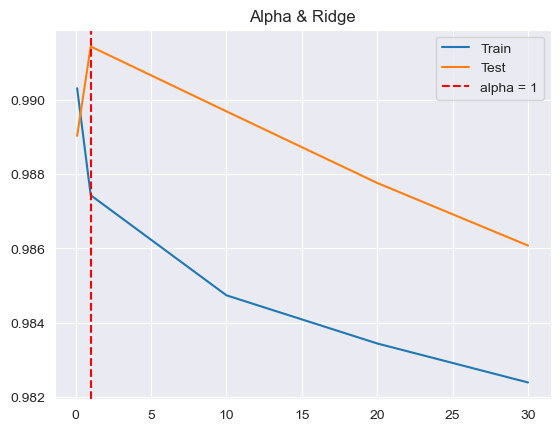

In [64]:
# 학습, 테스트 점수 기반 시각화
import matplotlib.pyplot as plt
plt.plot(alps, r_score[0], label = 'Train')
plt.plot(alps, r_score[1], label = 'Test')
plt.axvline(bestalpha, linestyle = '--', color = 'red', label = f'alpha = {bestalpha}')
plt.legend()
plt.title('Alpha & Ridge')


[규제 2] Lasso

In [65]:
from sklearn.linear_model import Lasso
lsmd = Lasso()
lsmd.fit(scaled_xtrain, ytrain)

C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.117e+03, tolerance: 4.884e+02
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [66]:
trainscore = lsmd.score(scaled_xtrain, ytrain)
testscore = lsmd.score(scaled_xtest, ytest)

print(f'[trainscore]\n {trainscore}\n [testscore]\n {testscore}')

[trainscore]
 0.9865761752892273
 [testscore]
 0.9912639062921962


In [67]:
# model parameter check


print(lsmd.n_iter_,'\n', lsmd.coef_,'\n', lsmd.intercept_)

1000 
 [ 0.          0.          0.          8.39678696  0.          0.
 13.70952971  0.         87.23199451 91.06954235 16.61716411  0.
 35.69479723  0.          0.         46.93195311  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         41.8984421
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.          0.          0.
 -0.         -0.          0.          0.         -0.         -0.
 -0.          0.          0.          0.         -0.         -0.
 -0.        ] 
 365.6404761904762


In [76]:
# ===> 최적의 규제 강도 설정값 찾기
alps = [0.1 , 1.0 , 10.0 ,20., 30. ]
l_score = [[],[]]

for a in alps:
    lsmd = Lasso(alpha= a, max_iter=50000)
    lsmd.fit(scaled_xtrain, ytrain)
    trainscore = lsmd.score(scaled_xtrain, ytrain)
    testscore = lsmd.score(scaled_xtest, ytest)
    
    l_score[0].append(trainscore)
    l_score[1].append(testscore)


In [78]:
#테스트 점수가 가장 높은 알파

bestalpha = l_score[1].index(max(l_score[1]))
bestalpha

1